# Machine Learning-Clustering Algorithms

Classify Black_Friday_sale.csv file using K-means clustering
1. Find the buyer's age group and their product of interest
2. Which Product category has the highest sales

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
df=pd.read_csv('Black_friday_sale.csv')

In [3]:
#summarize dataset
df.shape

(550068, 12)

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Data Exploration

In [5]:
#statistical analysis
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [8]:
#unique values
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [9]:
df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [10]:
df['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [11]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [12]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [14]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [15]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [16]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [17]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [18]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [19]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [20]:
df['Purchase'].unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613], dtype=int64)

In [21]:
#check for duplicates
df.duplicated().sum()

0

In [22]:
#check for null
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [23]:
# most of the rows in 'Product_Category_2' and 'Product_Category_3' are null, so better to drop the columns.
df.drop('Product_Category_2',axis=1,inplace=True)
df.drop('Product_Category_3',axis=1,inplace=True)

In [24]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# Data Preprocessing

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [26]:
#convert categorical columns data
from sklearn.preprocessing import LabelEncoder

labenc=LabelEncoder()

In [27]:
df['Age']=labenc.fit_transform(df['Age'])
df['Age']

0         0
1         0
2         0
3         0
4         6
         ..
550063    5
550064    2
550065    2
550066    6
550067    4
Name: Age, Length: 550068, dtype: int32

In [28]:
df['Gender']=labenc.fit_transform(df['Gender'])
df['Gender']

0         0
1         0
2         0
3         0
4         1
         ..
550063    1
550064    0
550065    0
550066    0
550067    0
Name: Gender, Length: 550068, dtype: int32

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  int32 
 3   Age                         550068 non-null  int32 
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int32(2), int64(5), object(3)
memory usage: 37.8+ MB


In [43]:
# select required features for Clustering
selected_col=['Age','Purchase']

In [44]:
#standarise numerical columns 
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scdf=scaler.fit_transform(df[selected_col])
scdf

array([[-1.84424754, -0.1779729 ],
       [-1.84424754,  1.1817558 ],
       [-1.84424754, -1.56119326],
       ...,
       [-0.36673935, -1.81701338],
       [ 2.58827703, -1.77162273],
       [ 1.11076884, -1.7467375 ]])

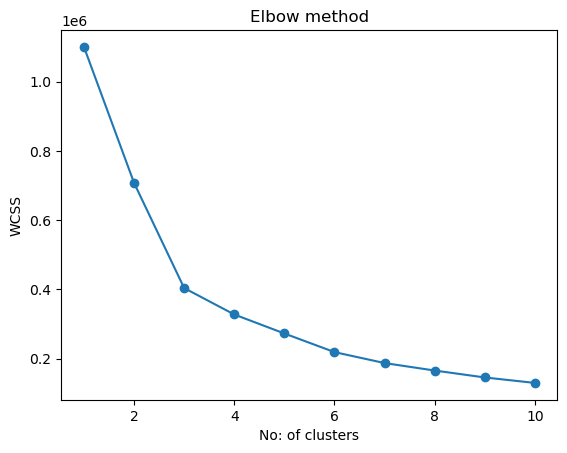

In [45]:
# find the optium k value by plotting elbow method (wcss v/s no: of clusters(k))
from sklearn.cluster import KMeans
inertia_value=[]
possible_k_value=range(1,11)

for i in possible_k_value:
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scdf)
    inertia_value.append(kmeans.inertia_)
    
#plot the elbow method to find optimum k
plt.plot(possible_k_value,inertia_value,marker='o')
plt.title('Elbow method')
plt.xlabel('No: of clusters(k)')
plt.ylabel('WCSS')
plt.show()

Observation:

choose k= 5 (where low inertia and low no:of clusters)

In [52]:
# apply K-Means clustering
k=5
kmeans=KMeans(n_clusters=5,random_state=0)
df['cluster']=kmeans.fit_predict(df[selected_col])

In [53]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,cluster
0,1000001,P00069042,0,0,10,A,2,0,3,8370,0
1,1000001,P00248942,0,0,10,A,2,0,1,15200,1
2,1000001,P00087842,0,0,10,A,2,0,12,1422,3
3,1000001,P00085442,0,0,10,A,2,0,12,1057,3
4,1000002,P00285442,1,6,16,C,4+,0,8,7969,0


In [54]:
df.cluster.value_counts()

0    236115
2    104474
3     94922
1     70497
4     44060
Name: cluster, dtype: int64

## Q) Find the buyer's age group and their product of interest?

In [71]:
# Analyze clusters and find age group and product of interest for each cluster
k=5
cluster_characteristics = []
for cluster_id in range(k):
    cluster_data = df[df['cluster']==cluster_id]
    
    dominant_age_group=cluster_data['Age'].mode()[0]
    product_of_interest=cluster_data['Product_ID'].mode()[0]
    
    cluster_characteristics.append({
        'Cluster': cluster_id,
        'Dominant_Age_Group': dominant_age_group,
        'Product_Of_Interest': product_of_interest
    })

cluster_characteristics_df=pd.DataFrame(cluster_characteristics)
cluster_characteristics_df

,Cluster,Dominant_Age_Group,Product_Of_Interest
0,0,2,P00265242
1,1,2,P00145042
2,2,2,P00051442
3,3,2,P00102642
4,4,2,P00025442


In [70]:
#Find the buyer's age group and their product of interest?
df.groupby('Age')['Product_ID'].agg(pd.Series.mode).to_frame()

,Product_ID
Age,
0,P00255842
1,P00265242
2,P00265242
3,P00025442
4,P00265242
5,P00265242
6,P00265242


## Q) Which Product category has the highest sales?

In [72]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,cluster
0,1000001,P00069042,0,0,10,A,2,0,3,8370,0
1,1000001,P00248942,0,0,10,A,2,0,1,15200,1
2,1000001,P00087842,0,0,10,A,2,0,12,1422,3
3,1000001,P00085442,0,0,10,A,2,0,12,1057,3
4,1000002,P00285442,1,6,16,C,4+,0,8,7969,0


In [86]:
max_sales_category=df.groupby('Product_Category_1')['Purchase'].sum().idxmax()
max_sales_value=df.groupby('Product_Category_1')['Purchase'].sum().max()

print("Product Category with Highest Sales: Product Category", max_sales_category)
print("Highest Sales Value:", max_sales_value)

Product Category with Highest Sales: Product Category 1
Highest Sales Value: 1910013754


In [84]:
max_sales_product=df.groupby('Product_ID')['Purchase'].sum().idxmax()
max_sales_value=df.groupby('Product_ID')['Purchase'].sum().max()

print("Product ID with Highest Sales:", max_sales_product)
print("Highest Sales Value:", max_sales_value)

Product ID with Highest Sales: P00025442
Highest Sales Value: 27995166
